In [27]:
from GetData import FetchData
from Preprocessing import PreprocessingTrainingDataset
from Model import build_and_compile_model

import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [28]:
dataset = pd.read_csv('training_dataset.csv')

In [29]:
dataset = PreprocessingTrainingDataset(dataset=dataset)
dataset.set_target()
dataset.standard_scaled()

test_dataset, test_target = dataset.test()

In [30]:
model = build_and_compile_model()

model.build(input_shape=(1, 2))
model.load_weights('ModelWeights.h5')

In [31]:
prediction = model.predict(test_dataset, verbose=0)

In [32]:
metrics = tf.keras.metrics.MeanSquaredError()
metrics.update_state(test_target, prediction)
metrics.result().numpy()

0.00113283

In [33]:
prediction = dataset.standard_scaler.inverse_transform(prediction)

test_target = dataset.standard_scaler.inverse_transform(test_target)

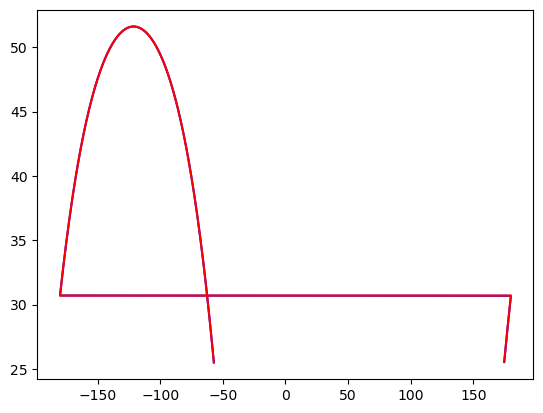

In [34]:
plt.plot(test_target[:, 0], test_target[:, 1], color='b')
plt.plot(prediction[:, 0], prediction[:, 1], color='r')
#plt.ylim([-180, 180])
plt.show()

In [37]:
metrics = r2_score(test_target, prediction)
print(f'r2_score: {round(metrics, 3)}')

r2_score: 0.998
